### Importing packages

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Exploratory Data Analysis

In [134]:
delivery_data = pd.read_csv("parcel_delivery_dataset.csv")

delivery_data.head()

,parcel_id,shipment_date,is_weekend,hour,distance_km,parcel_size,parcel_weight_kg,traffic_level,weather_condition,delivery_time_window
0,1,2024-04-17,0,14,38.079472,small,3.330077,low,foggy,afternoon
1,2,2024-07-07,1,14,95.120716,medium,0.675873,low,rainy,afternoon
2,3,2024-03-27,0,14,73.467400,medium,45.398848,high,sunny,evening
3,4,2024-04-29,0,14,60.267190,medium,28.637023,low,sunny,evening
4,5,2024-06-06,0,9,16.445845,small,9.344217,high,snowy,evening


In [135]:
delivery_data.dtypes

parcel_id                 int64
shipment_date            object
is_weekend                int64
hour                      int64
distance_km             float64
parcel_size              object
parcel_weight_kg        float64
traffic_level            object
weather_condition        object
delivery_time_window     object
dtype: object

In [136]:
duplicate_rows = delivery_data[delivery_data.duplicated()]

print(f"There are {duplicate_rows.shape[0]} duplicate rows.")

There are 0 duplicate rows.


In [148]:
rows_with_nulls = delivery_data.isnull().sum()
print(rows_with_nulls)

is_weekend              0
hour                    0
distance_km             0
parcel_size             0
parcel_weight_kg        0
traffic_level           0
weather_condition       0
delivery_time_window    0
season                  0
dtype: int64


So there are no duplicate rows in the dataset and no rows containing any NaN or Null values.

In [149]:
delivery_data.head()

,is_weekend,hour,distance_km,parcel_size,parcel_weight_kg,traffic_level,weather_condition,delivery_time_window,season
0,0,14,38.079472,small,3.330077,low,foggy,afternoon,Spring
1,1,14,95.120716,medium,0.675873,low,rainy,afternoon,Summer
2,0,14,73.467400,medium,45.398848,high,sunny,evening,Spring
3,0,14,60.267190,medium,28.637023,low,sunny,evening,Spring
4,0,9,16.445845,small,9.344217,high,snowy,evening,Summer


In [139]:
delivery_data.nunique()

parcel_id               50000
shipment_date             366
is_weekend                  2
hour                       17
distance_km             50000
parcel_size                 3
parcel_weight_kg        50000
traffic_level               3
weather_condition           4
delivery_time_window        3
dtype: int64

There are exactly the amount of values for the object dtype columns as you would expect (3, 3, 4 and 3), meaning there are no misspellings of categories. 

In [140]:
delivery_data = delivery_data.drop(['parcel_id'], axis = 1)

delivery_data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_weekend,50000.0,0.284080,0.450980,0.000000,0.000000,0.000000,1.000000,1.000000
hour,50000.0,12.587480,4.069275,6.000000,9.000000,14.000000,14.000000,22.000000
distance_km,50000.0,50.387477,28.552232,1.000548,25.642078,50.390299,75.081838,99.997243
parcel_weight_kg,50000.0,25.210404,14.273970,0.500780,12.798958,25.230957,37.450028,49.996822


Remove parcel_id, as I assume it has no predictive power for the delivery window.

In [141]:
def get_season(date):
  m = date.month
  x = m%12 // 3 + 1
  if x == 1:
    season = "Winter"
  if x == 2:
    season = "Spring"
  if x == 3:
    season = "Summer"
  if x == 4:
    season = "Autumn"
  return season

delivery_data['season'] = pd.to_datetime(delivery_data['shipment_date'], format = '%Y-%m-%d')

delivery_data['season'] = delivery_data['season'].apply(get_season)

delivery_data = delivery_data.drop(['shipment_date'], axis = 1)


Create a new column called 'season' from the shipment_date column. Season could be a good feature to predict the delivery_time_window.

In [142]:
cat_cols=delivery_data.select_dtypes(include=['object']).columns
num_cols = delivery_data.select_dtypes(include=np.number).columns.tolist()

is_weekend
Skew : 0.96


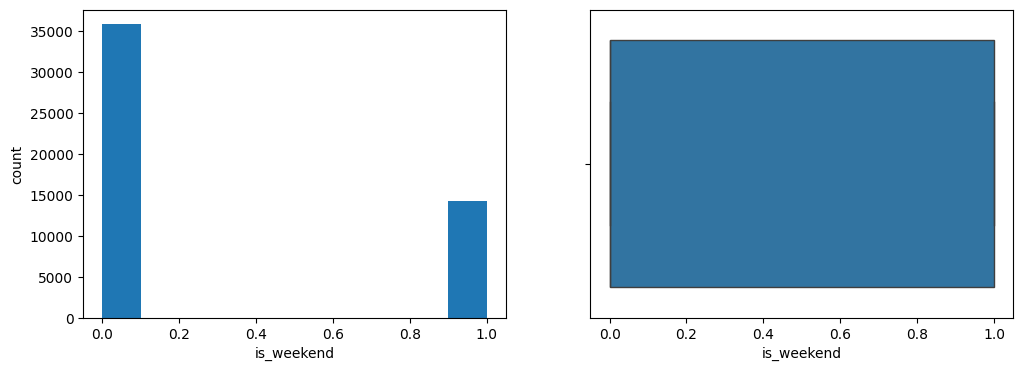

hour
Skew : 0.66


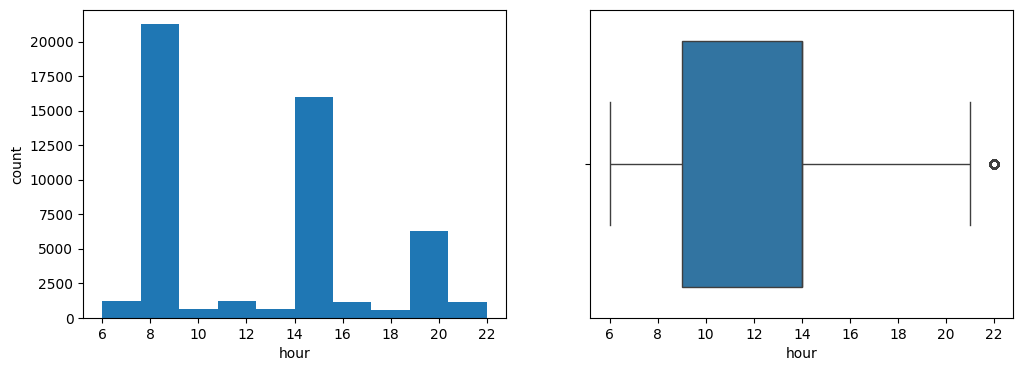

distance_km
Skew : 0.01


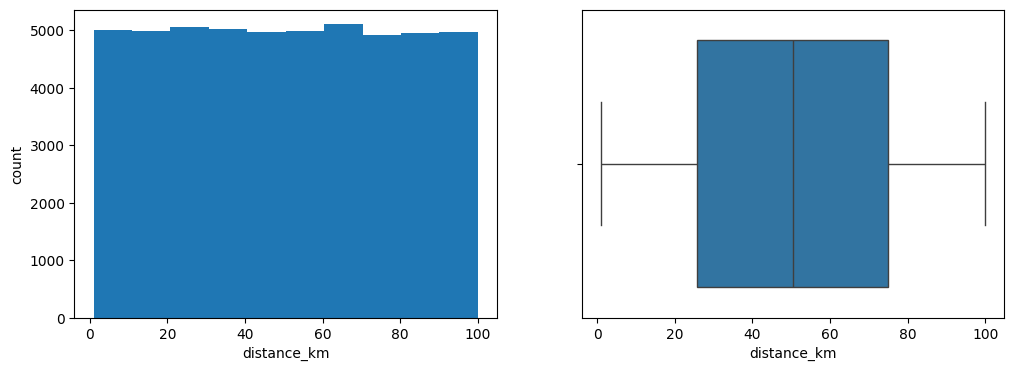

parcel_weight_kg
Skew : -0.0


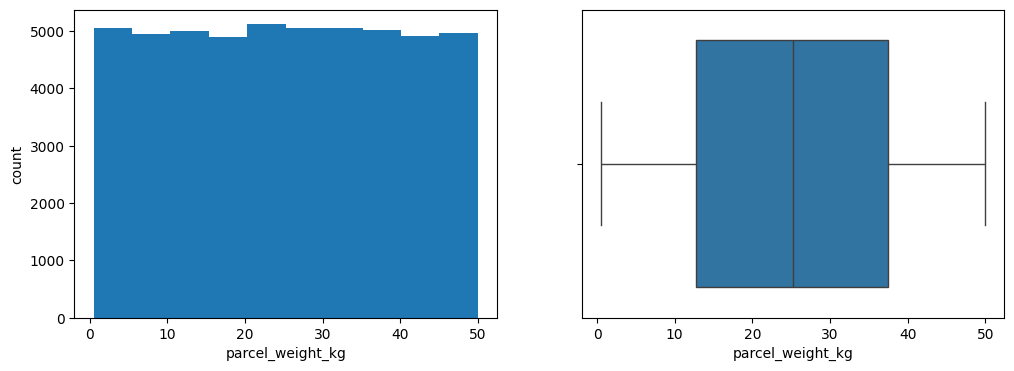

In [143]:
for col in num_cols:
    print(col)
    print('Skew :', round(delivery_data[col].skew(), 2))
    plt.figure(figsize = (12, 4))
    plt.subplot(1, 2, 1)
    delivery_data[col].hist(grid=False)
    plt.ylabel('count')
    plt.xlabel(col)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=delivery_data[col])
    plt.show()

As is evident from the plots, there is about an equal amount of examples for the distance_km and parcel_weight values. is_weekend is skewed to the 0 (week days), which makes sense as there are both more weekdays and more packages get send during the week. The expected delivery hour peaks at ~9, 15 and 19/20, with few packages being delivered after 18. 9 and 15 are the mean hours from the delivery windows, so it makes sense that those are the most prevalent times. Few packages get delivered in the evening.

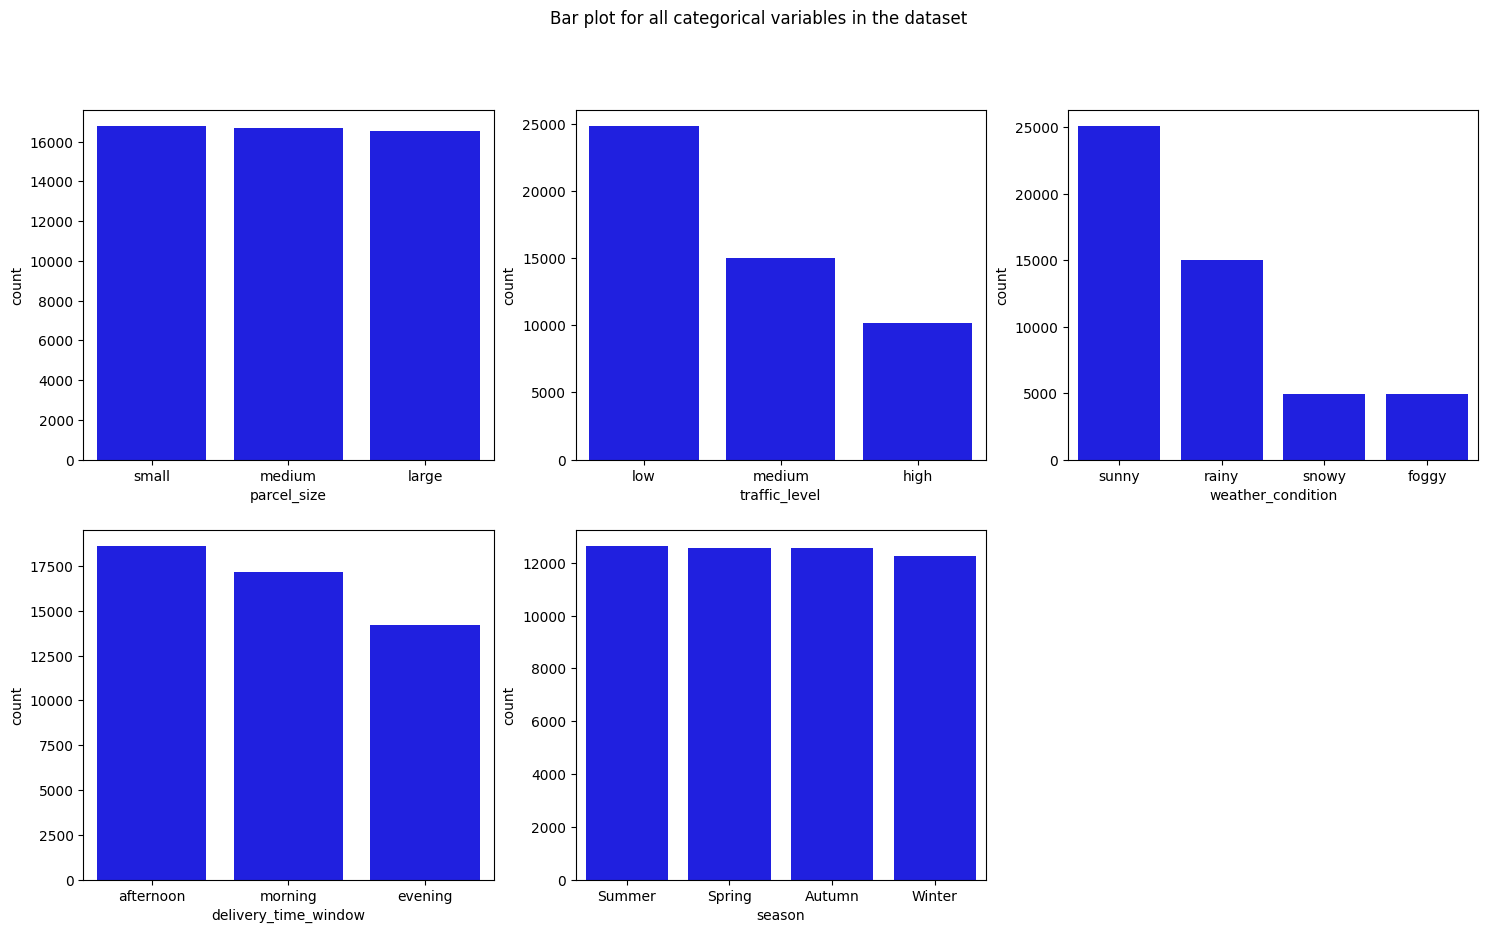

In [144]:
fig, axes = plt.subplots(2, 3, figsize = (18, 10))
axes[1][2].set_visible(False)
fig.suptitle('Bar plot for all categorical variables in the dataset')
for ax, col in zip(axes.ravel()[:-1], cat_cols):
    sns.countplot(ax = ax, x = col, data = delivery_data, color = 'blue', order = delivery_data[col].value_counts().index)
    ax.set_xlabel(col)


In [151]:
plt.figure(figsize=(10,5))
sns.pairplot(data = delivery_data.drop(num_cols, axis = 1))
plt.show()

ValueError: No variables found for grid columns.

<Figure size 1000x500 with 0 Axes>